# Warm Up Python

Para un proyecto de ML es importante realizar una análisis previo de los datos con el fin de alistarlos para la fase de modelamiento.

## Objetivo:
El objetivo de este taller es aprender códigos básicos que te permitiran abordar en tus proyectos personales la fase de preprocesamiento y exploración de los datos.

## Exploración de Datos
Para esta fase inicial conocer algunas funciones que nos provee pandas para facilitarnos la vida son fundamentales.  Dentro de esta fase se desea identificar el dataset que tipo de datos maneja, si tenemos nulos en nuestro conjunto de datos, entre otros.

Estas son algunas funciones que nos sirven para esta fase:

```python
df.head()
df.tail()
df.info()
df.shape
df.columns
df.describe()
df.value_counts()
df.unique()
df.nunique()
```

Trabajemos con el famoso conjunto de datos del [titanic](https://www.kaggle.com/c/titanic/data).

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0).
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger.  Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticket.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.

In [1]:
!pip3 install --user numpy
!pip3 install --user pandas

In [2]:
import numpy as np
np.__version__

'1.18.1'

In [3]:
import pandas as pd

# Cargamos el archivo
titanic = pd.read_csv("train.csv")

In [4]:
# Visualiza las primeras 2 filas del titanic
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# Visualiza las ultimas 2 filas del titanic
titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Conocer cuantas filas y columnas tiene nuestro dataset
titanic.shape

(891, 12)

In [7]:
# Tipos de datos que tiene nuestro dataset y que cantidad de nulos tiene
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Otra manera de visualizar los nulos por columna
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Otra manera de conocer los tipos de datos
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Resumen de las columnas numericas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Resumen de las columnas categoricas
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ponesell, Mr. Martin",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# Valores unicos por columna sin tener en cuenta nulos
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
# Valores unicos por columna teniendo en cuenta nulos
titanic.nunique(dropna=False)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [14]:
# Conteo de valores por columna de no nulos
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
# Valor mas frecuente en la serie
titanic['Embarked'].mode()

0    S
dtype: object

In [16]:
# Valores unicos de la columna 'Embarked'
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# Cuantos registros tenemos por categoria de la columna 'Embarked' sin nulos
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# Cuantos registros tenemos por categoria de la columna 'Embarked' con nulos
titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [19]:
# Cuales son los nombres de las columnas del dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ahora que tenemos una idea de la información que tenemos, vamos a empezar a transformarla para poder tener nuestros datos listos para la fase de visualización, de esta fase podemos concluir que PassengerId y Name que tienen 891 registros unicos no son columnas que nos sirvan para un analisis posterior, la columna Ticket tambien son 681 valores unicos esta tampoco nos sirve, y por ultimo la columna Cabin tiene el 77% de los datos nulos, lo que hace que tampoco nos sirva para más adelante.

### Practica

Con las columnas Genero ('Sex'), Edad ('Age') y el valor del tiquete ('Fare'), responde las siguientes preguntas:

- ¿Cuantos Hombres y Mujeres tenemos en nuestro dataset?
- ¿Cual es la edad mas frecuente en nuestro conjunto de datos?
- ¿Cual es la edad mas frecuente en las mujeres?
- ¿Cual es la edad mas frecuente en los hombres?
- ¿Cual es el precio del tiquete mas común?
- ¿El precio del tiquete mas común es el mismo para hombres y para mujeres?

In [20]:
#¿Cuantos Hombres y Mujeres tenemos en nuestro dataset?
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Deberia de tener el siguiente resultado:**

```
male      577
female    314
Name: Sex, dtype: int64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Sex'].value_counts()
-->

In [21]:
#¿Cual es la edad mas frecuente en nuestro conjunto de datos?
titanic['Age'].mode()

0    24.0
dtype: float64

**Deberia de tener el siguiente resultado:**

```
0    24.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Age'].mode()
-->

In [22]:
#¿Cual es la edad mas frecuente en las mujeres?
titanic[titanic['Sex']=='female']['Age'].mode()

0    24.0
dtype: float64

**Deberia de tener el siguiente resultado:**

```
0    24.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic[titanic['Sex']=='female']['Age'].mode()
-->

In [23]:
#¿Cual es la edad mas frecuente en los hombres?
titanic[titanic['Sex']=='male']['Age'].mode()

0    19.0
1    25.0
2    28.0
dtype: float64

**Deberia de tener el siguiente resultado:**

```
0    19.0
1    25.0
2    28.0
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic[titanic['Sex']=='male']['Age'].mode()
-->

In [24]:
#¿Cual es el precio del tiquete mas común?
titanic['Fare'].mode()

0    8.05
dtype: float64

**Deberia de tener el siguiente resultado:**

```
0    8.05
dtype: float64
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic['Fare'].mode()
-->

In [25]:
#¿El precio del tiquete más común es el mismo para hombres y para mujeres?
print(f"Precio común del tiquete para mujeres: {titanic[titanic['Sex']=='female']['Fare'].mode()[0]}")
print(f"Precio común del tiquete para hombres: {titanic[titanic['Sex']=='male']['Fare'].mode()[0]}")

Precio común del tiquete para mujeres: 7.75
Precio común del tiquete para hombres: 8.05


**Deberia de tener el siguiente resultado:**

```
Precio común del tiquete para mujeres :7.75
Precio común del tiquete para hombres :8.05
```

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
print('Precio común del tiquete para mujeres :' + str(titanic[titanic['Sex']=='female']['Fare'].mode()[0]))
print('Precio común del tiquete para hombres :' + str(titanic[titanic['Sex']=='male']['Fare'].mode()[0]))
-->

## Preprocesamiento:
Para esta fase tener un buen conocimiento de Pandas será muy útil, adicional estructurar esta fase de preprocesamiento con la ayuda de funciones, nos permitirá tener codigo que podremos reutilizar en otros proyectos.

Dentro de las actividades que se podrían hacer en preprocesamiento se encuentras las siguientes:

**Borrar columnas**

**Enriching (or Transforming)** un conjunto de datos, agregando columnas recién calculadas en los índices.

**Filtering** seleccionando un subconjunto de las filas o columnas de un conjunto de datos de acuerdo con algún criterio.

**Indexing** agregando índices a un conjunto de datos.

**Aggregating**

**Sorting** ordenar las filas de un conjunto de datos según algún criterio

**Merging** fusionar los conjuntos de datos de alguna manera. Esto incluye: concatenación (horizontal o vertical) y también unión.

**Pivoting**: esto incluye la transposición y la realización de otras operaciones para que los datos que originalmente tenían un diseño vertical se distribuyan horizontalmente (aumentando el número de columnas) o viceversa (aumentando el número de filas). 

Entre otras.

In [26]:
# Eliminar columnas PassengerId, Name, Cabin, la columna ticket no la vamos a eliminar todavia.
titanic.drop(['PassengerId','Name','Cabin'], axis=1, inplace=True)
titanic.shape

(891, 9)

In [27]:
# Validar nulos nuevamente
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [28]:
# En los primeros 10 registros tenemos un campo de edad nulo, vamos a tenerlo como referencia para lo que vamos a hacer
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


### Nulos
Dependiendo del problema el tratamiento de los nulos se puede manejar de diferentes maneras:

* Conservalos
* Eliminarlos
* Dejar un valor fijo que los diferencie
* Reemplazarlos con un estadistico (media, mediana, moda) Cual usar si tenemos outliers?
* Forward o backward fill

In [29]:
# Para eliminarlos usamos
titanic.dropna(inplace=True)
titanic.shape

(712, 9)

In [30]:
# Validar nulos nuevamente
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
# En los primeros 10 registros tenemos un campo de edad nulo, vamos a tenerlo como referencia para lo que vamos a hacer
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,S


In [32]:
# Dejar un valor fijo que los diferencie
titanic = pd.read_csv("train.csv")
titanic.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)
titanic.fillna(-1).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,-1.0,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


In [33]:
titanic['Age'].fillna(titanic['Age'].mean()).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [34]:
titanic['Age'].fillna(titanic['Age'].median()).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [35]:
titanic['Age'].fillna(titanic['Age'].mode()[0]).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    24.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [36]:
titanic['Age'].fillna(method='backfill').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [37]:
titanic['Age'].fillna(method='ffill').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Para nuestro ejercicio tomaremos la decisión de borrar los nulos.

In [38]:
# Para eliminarlos usamos
titanic.dropna(inplace=True)
titanic.shape

(712, 9)

### Columnas
Para ser practicos, normalmente modificamos los nombres de las columnas con el fin de quitar espacios en blanco, caracteres especiales, dejar los nombres en minuscula así que a continuacion realizaremos ese cambio.

In [39]:
# Cambiar nombre de columnas a minúsculas
titanic.rename(columns=lambda col: col.lower(), inplace=True)

In [40]:
# Validar dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
survived    712 non-null int64
pclass      712 non-null int64
sex         712 non-null object
age         712 non-null float64
sibsp       712 non-null int64
parch       712 non-null int64
ticket      712 non-null object
fare        712 non-null float64
embarked    712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


### Indices

In [41]:
# Luego de eliminar los nulos, se debe de resetear los indices, como puedes ver aparecen de 0 a 890 todavia 
# a pesar de que tenemos 712 filas.
titanic.reset_index(drop=True, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
survived    712 non-null int64
pclass      712 non-null int64
sex         712 non-null object
age         712 non-null float64
sibsp       712 non-null int64
parch       712 non-null int64
ticket      712 non-null object
fare        712 non-null float64
embarked    712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 50.2+ KB


### Agrupación

In [42]:
# Validar los tickets duplicados
df_tickets = titanic.groupby('ticket').size().reset_index().rename(columns={0:'count'})
df_tickets.head()

,ticket,count
0,110152,3
1,110413,3
2,110465,1
3,110564,1
4,110813,1


### Ordenando

In [43]:
# Ordenar los cantidad de registros por tickets
df_tickets.sort_values(by=["count"], ascending=False, inplace=True)
df_tickets.head()

,ticket,count
273,347082,7
445,CA 2144,6
207,3101295,6
277,347088,6
490,S.O.C. 14879,5


In [44]:
# Validemos un tiquete
titanic[titanic['ticket']=='347082']

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
12,0,3,male,39.0,1,5,347082,31.275,S
93,0,3,female,2.0,4,2,347082,31.275,S
428,0,3,female,9.0,4,2,347082,31.275,S
429,0,3,female,11.0,4,2,347082,31.275,S
481,0,3,female,39.0,1,5,347082,31.275,S
649,0,3,female,6.0,4,2,347082,31.275,S
676,0,3,male,4.0,4,2,347082,31.275,S


### Uniendo datasets
Uno de las tareas que se realizan en preprocesamiento es enriquecer la información, crearemos una nueva columna llamada 'family' en esta realizaremos una marcación de 1 si el viaje fue familiar o viajaron solos.

#### Merge and join

Ambas funciones permiten que los datos de diferentes dataframes se combinen en uno solo de acuerdo con una regla de "cruce" o "búsqueda".

Aunque tanto `merge` como` join` hacen cosas similares, la forma en que lo hacen es diferente.

La función `merge` es la función predeterminada de pandas para unir datos. Básicamente es contraparte de *pandas de la unión de SQL*, y requiere la especificación de qué columnas de ambos dataframes se compararán. A Merge no le importa en absoluto los índices definidos en ellos.

Por otro lado, la función `join` de Panda es más conveniente (incluso utiliza merge internamente), unir es básicamente hacer una fusión aprovechando los índices de ambos marcos de datos.

La siguiente figura resume los diferentes 4 tipos de combinaciones: _inner, outer, left and right_.

<img src="merge.png"/>

La función merge también está disponible como método en la clase `DataFrame`.
La sintaxis básica es:

```
new_joined_df = df.merge (another_df, left_on = "col_in_df", right_on = "col_in_another_df",
                          how="inner"|"left"|"right"|"outer")
```

El primer argumento (`another_df`), así como` left_on` y `right_on` son argumentos obligatorios.
`left_on` especifica un nombre de columna en el dataframe `df` cuyos valores deben coincidir con
los de la columna `another_df` 'especificados en `right_on`.

El argumento `how` es opcional y por defecto es `inner`.

In [45]:
# Primero adicionaremos la columna 'count' de df_tickets a nuestro dataset titanic
titanic = titanic.merge(df_tickets,left_on='ticket',right_on='ticket',how='left')
titanic.shape

(712, 10)

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,female,35.0,1,0,113803,53.1000,S,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1


### Enriquecer dataset

In [47]:
titanic['family'] = [1 if count > 1 else 0 for count in titanic['count']]

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count,family
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,1,1,female,35.0,1,0,113803,53.1000,S,2,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0


### Limpliando Cadenas

In [49]:
# Recuerdan las funciones? vamos a crear una funcion que nos servira para limpiar texto, en este caso el campo tickets
def limpiar_caracteres(cadena):
    import re
    patron = '[^A-Za-z0-9]+'
    return re.sub(patron, '', cadena)

In [50]:
titanic['ticket'] = titanic['ticket'].apply(limpiar_caracteres)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count,family
0,0,3,male,22.0,1,0,A521171,7.2500,S,1,0
1,1,1,female,38.0,1,0,PC17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STONO23101282,7.9250,S,1,0
3,1,1,female,35.0,1,0,113803,53.1000,S,2,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0


In [51]:
# Para continuar eliminaremos la columna ticket
titanic.drop('ticket', axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1
4,0,3,male,35.0,0,0,8.0500,S,1,0


### Codificando variables categoricas

En ocasiones se requiere volver columnares nuestros datos categoricos, para esto usamos tambien un metodo de pandas llamado get_dummies.

In [52]:
titanic['sexDummies'] = titanic['sex']
titanic = pd.get_dummies(titanic, columns=['sexDummies'], prefix=['D'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family,D_female,D_male
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


Que hemos aprendido:

- Tratar Nulos
- Transformar columnas
- Enriquecer información en nuestro dataset adicionando columnas calculadas
- Hacer agregaciones
- Unir datasets.
- Limpiar texto con la ayuda de Regex
- Codificando variables categoricas

### Practica

- Agrupar el conjunto de datos por genero ('sex') y calcular el promedio de la edad ('age').
- Agrupar el conjunto de datos por la columna familia ('family') y contar la cantidad de registros por grupo.
- De las familias cuantos se sobrevivieron y cuantos no.

In [53]:
# Agrupar el conjunto de datos por genero ('sex') y calcular el promedio de la edad ('age')
titanic[['sex', 'age']].groupby('sex').mean().reset_index()

,sex,age
0,female,27.745174
1,male,30.726645


 **Deberia de tener el siguiente resultado:**

| |sex| age | 
|-----|-----|-----|
|0|	female|	27.915709|
|1|male|30.726645|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby('sex').agg({'age':'mean'}).reset_index()
-->

In [54]:
# Agrupar el conjunto de datos por la columna familia ('family') y contar la cantidad de registros por grupo.
titanic.groupby('family').size().reset_index().rename(columns={0: 'count'})

,family,count
0,0,431
1,1,281


 **Deberia de tener el siguiente resultado:**

| |family| count | 
|-----|-----|-----|
|0|	0|	547|
|1|1|344|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby(['family']).size().reset_index().rename(columns={0:'count'})
-->

In [55]:
# De las familias cuantos se sobrevivieron y cuantos no.
titanic.groupby(['family', 'survived']).size().reset_index().rename(columns={0: 'count'})

,family,survived,count
0,0,0,293
1,0,1,138
2,1,0,131
3,1,1,150


 **Deberia de tener el siguiente resultado:**

| |family| survived | count |
|-----|-----|-----|-----|
|0|	0|	0| 384|
|1|	0|	1| 163|
|2|	1|	0| 165|
|3|	1|	1| 179|

Doble-clic __Aqui__ para la solución.

<!-- Your answer is below:
titanic.groupby(['family','survived']).size().reset_index().rename(columns={0:'count'})
-->

## Visualización:
Para apoyar el análisis descriptivo de los datos usamos la exploración de estos a través de gráficos que nos permiten conocer más la información que vamos a utilizar para nuestros modelos, para esta fase es muy util tener conocimiento de las librerias de Python que nos permiter generar estas visualizaciones como Matplotlib y Seaborn, Pandas tambien tiene unos métodos de visualización. 

In [56]:
!pip3 install --user matplotlib
!pip3 install --user seaborn

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family,D_female,D_male
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


### Lineas

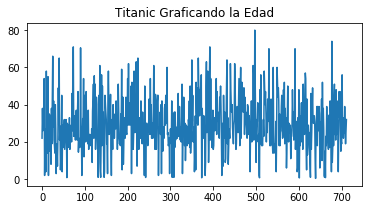

In [58]:
# Empecemos con un grafico sencillo, al no colocar X se asume que x es cada uno de los registros.
plt.figure(figsize=(6, 3))
plt.plot(titanic['age'])
plt.title('Titanic Graficando la Edad')
plt.show()

### Histogramas

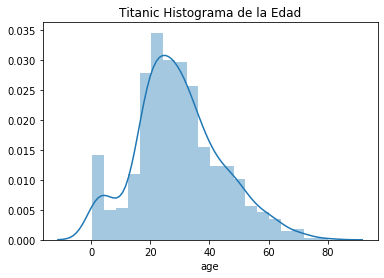

In [59]:
plt.figure(figsize=(6, 4))
sns.distplot(titanic['age'])
plt.title('Titanic Histograma de la Edad')
plt.show()

Text(0.5, 0, 'age')

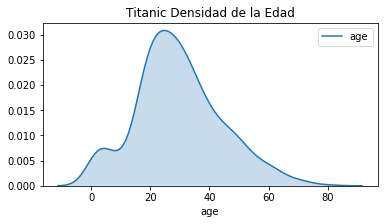

In [60]:
# Si solo queremos la funcion de densidad
plt.figure(figsize=(6, 3))
sns.kdeplot(titanic['age'], shade=True)
plt.title('Titanic Densidad de la Edad')
plt.xlabel('age')

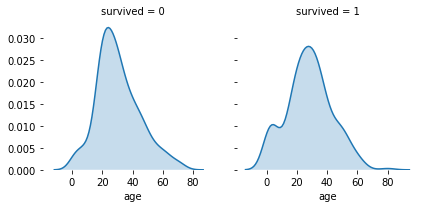

In [61]:
g = sns.FacetGrid(titanic, col="survived", height=3)
g.map(sns.kdeplot, 'age', shade=True)
g.despine(left=True, bottom=True)

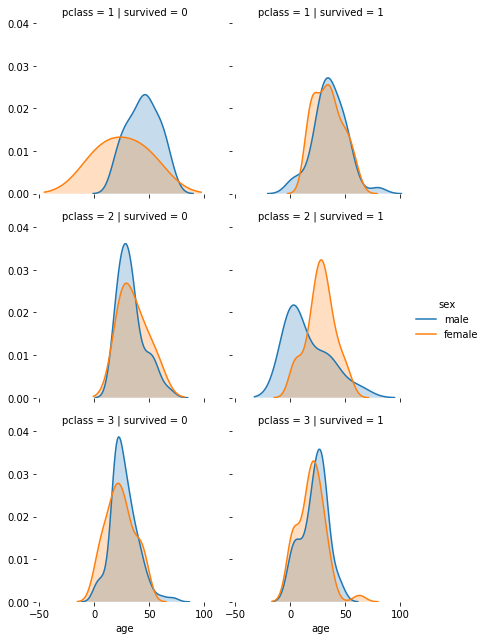

In [62]:
g = sns.FacetGrid(titanic, col='survived', row='pclass', hue='sex', height=3)
g.map(sns.kdeplot, 'age', shade=True).add_legend()
g.despine(left=True, bottom=True)
plt.show()

### Boxplot

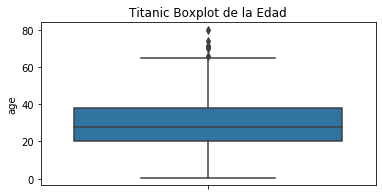

In [63]:
plt.figure(figsize=(6, 3))
sns.boxplot(titanic['age'], orient='v')
plt.title('Titanic Boxplot de la Edad')
plt.show()

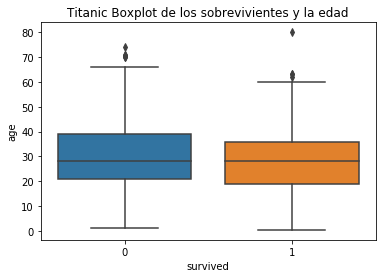

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Titanic Boxplot de los sobrevivientes y la edad')
plt.show()

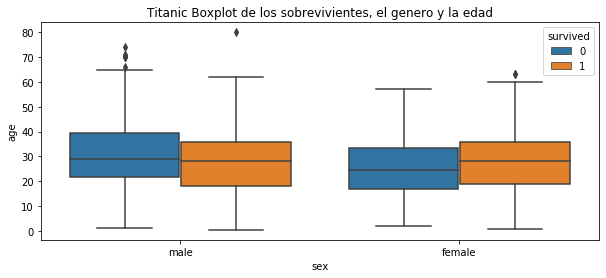

In [65]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='sex', y='age', hue='survived', data=titanic)
plt.title('Titanic Boxplot de los sobrevivientes, el genero y la edad')
plt.show()

### Barras

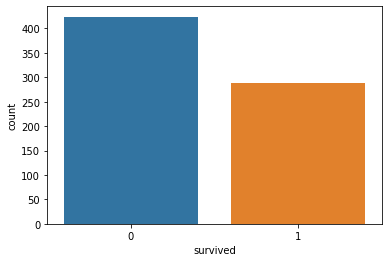

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot('survived', data=titanic)
plt.show()

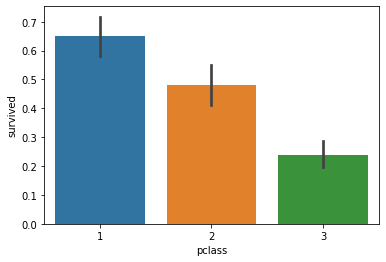

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(y='survived', x='pclass', data=titanic)
plt.show()

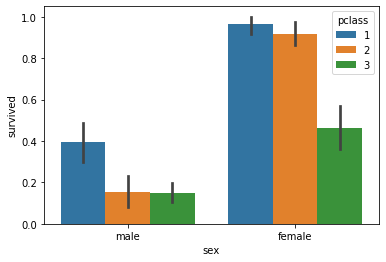

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(y='survived', x='sex', hue='pclass', data=titanic)
plt.show()

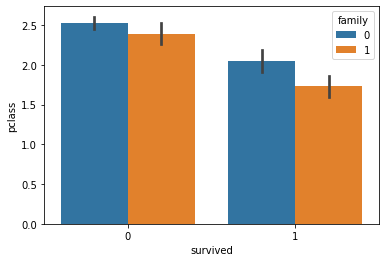

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(y='pclass', x='survived',hue='family',data=titanic)
plt.show()

# Heatmap

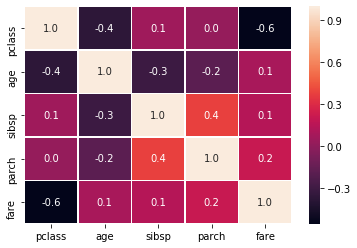

In [70]:
plt.figure()
sns.heatmap(titanic.drop(['survived','family','D_female','D_male','count'],axis=1).corr(),
            annot=True, linewidth=0.5, fmt='.1f')
plt.show()

### Scatter Plot

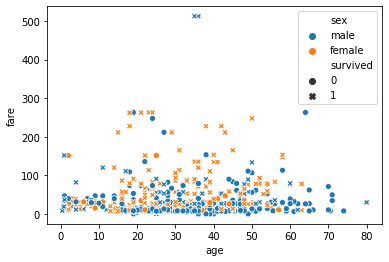

In [71]:
plt.figure()
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=titanic)
plt.show()

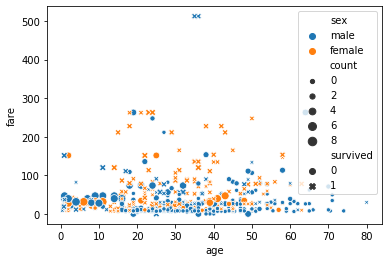

In [72]:
plt.figure()
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', size='count', data=titanic)
plt.show()

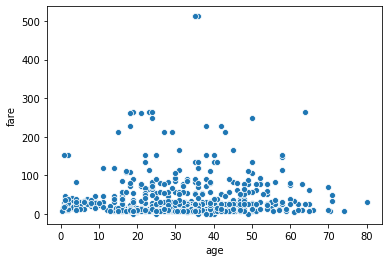

In [73]:
plt.figure()
sns.scatterplot(x='age', y='fare', data=titanic)
plt.show()

### Practicar


El Departamento de Estadísticas de Educación publica anualmente un conjunto de datos que contiene el porcentaje de títulos de licenciatura otorgados a mujeres de 1970 a 2012. El conjunto de datos se divide en 17 categorías de títulos, con cada columna como una categoría separada.

Randal Olson, científico de datos de la Universidad de Pensilvania, limpió el conjunto de datos y lo puso a disposición en su sitio web personal. Puede descargar el conjunto de datos Randal compilado [aquí](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv). Aquí hay una vista previa de las primeras filas:

In [74]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


Randal compiló este conjunto de datos para explorar la brecha de género en los campos STEM, que significa ciencia, tecnología, ingeniería y matemáticas. Esta brecha se informa a menudo en las noticias y no todos están de acuerdo en que existe una brecha.

El objetivo de esta practica es explorar esta información y validar si se evidencia alguna brecha de género utilizando una visualización de datos efectiva. Primero generemos un diagrama matplotlib estándar.

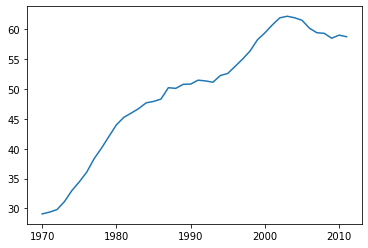

In [75]:
plt.plot(women_degrees["Year"],women_degrees["Biology"])
plt.show()

In [76]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

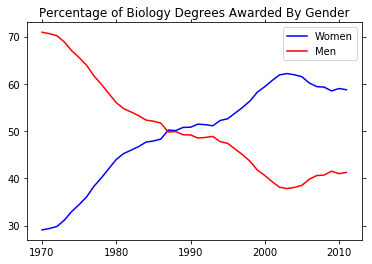

In [77]:
plt.plot(women_degrees["Year"],women_degrees["Biology"],color='blue',label="Women")
plt.plot(women_degrees["Year"],100-women_degrees["Biology"],color='red',label="Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.tick_params(bottom="off",top="off",left="off",right="off")
plt.show()

In [78]:
def plot_gap(degree):
    plt.plot(women_degrees["Year"],women_degrees[degree],color='blue',label="Women")
    plt.plot(women_degrees["Year"],100-women_degrees[degree],color='red',label="Men")
    plt.title(f"Percentage of {degree} Degrees Awarded By Gender")
    plt.legend(loc="upper right")
    plt.tick_params(bottom="off",top="off",left="off",right="off")
    plt.show()

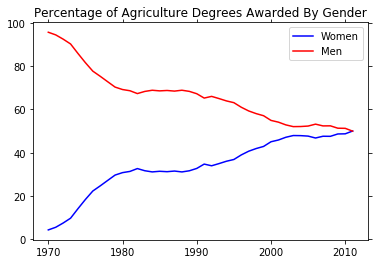

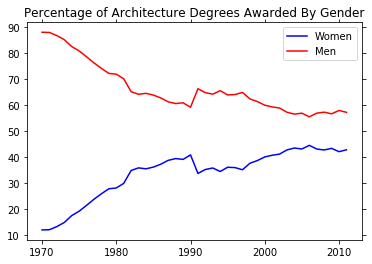

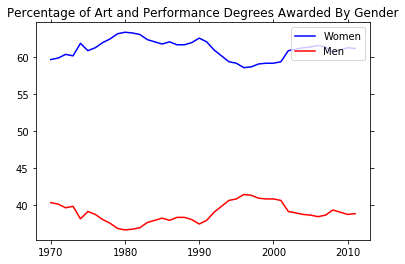

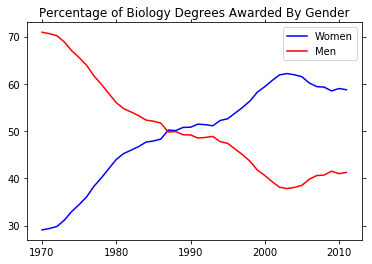

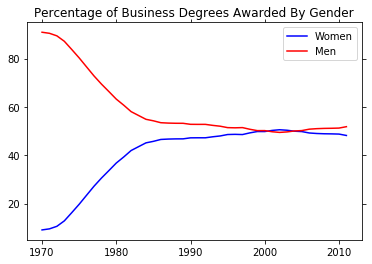

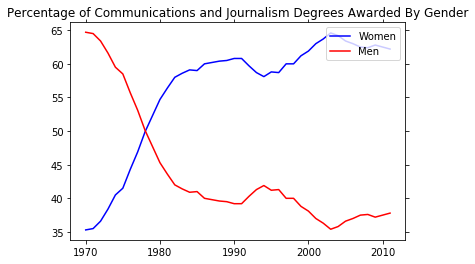

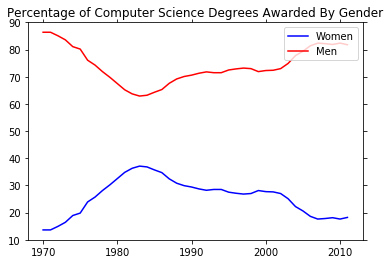

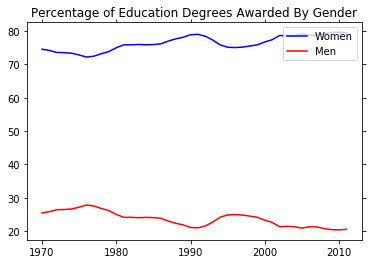

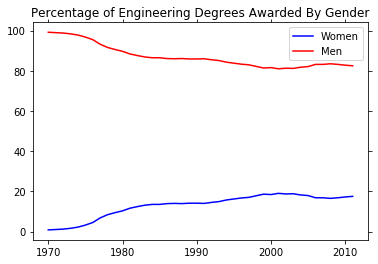

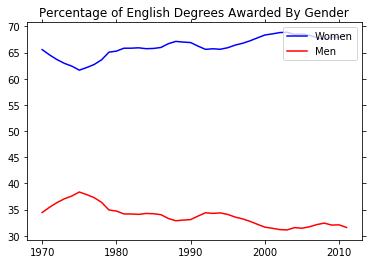

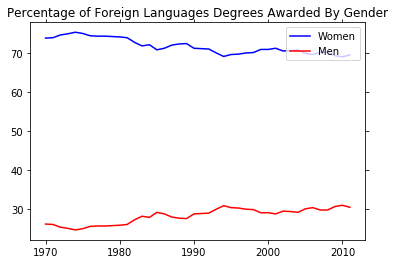

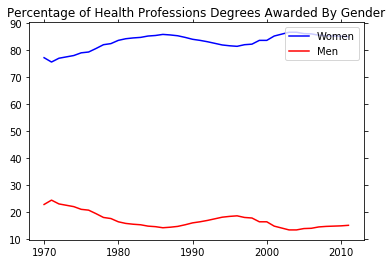

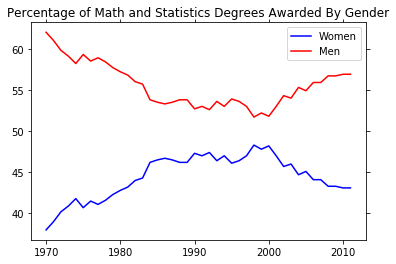

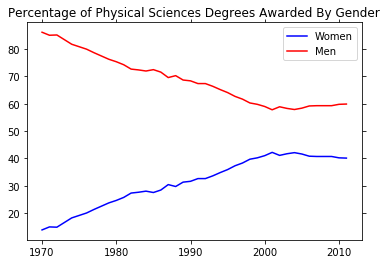

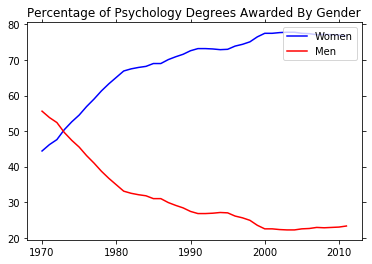

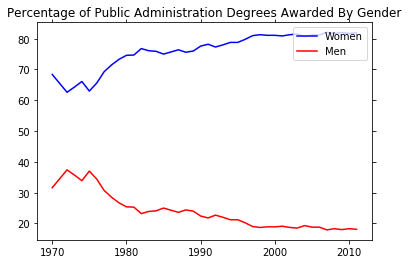

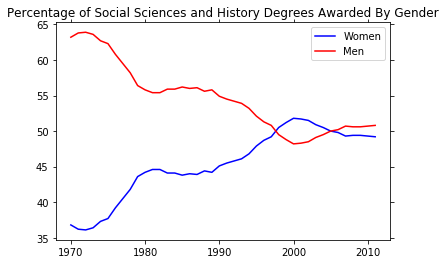

In [79]:
for degree in women_degrees.columns[1:]:
    plot_gap(degree)